
<div align="center">
  <a href="https://www.w-hs.de/maschinenbau-master-boh/">
    <img src="https://www.w-hs.de/typo3conf/ext/whs/Resources/Public/Images/Pagelayout/w-hs_pagelogo.png" 
    alt="Images" width="500" height="200">
  </a>
</div>
<br>
<h1 align="center"> Sondergebiete der Simulation</h1>
<h3 align="center"> WS 21/22 </h3>
<br>

### 1. Beschreibung des Systems: *freies, undgedämpftes inverses Pendel*
### 2. Herleitung der Bewegungsgleichungen nach Legrange
### 3. Numerische Lösung der Differentialgleichungen
### 4. Animation der Ergebnisse

Dieses Jupyter Notebook wurde auf Grundlage folgender Beispiele erstellt:
* [lukepolson](https://github.com/lukepolson/youtube_channel/blob/main/Python%20Metaphysics%20Series/vid25.ipynb)
* [zjor](https://github.com/zjor/inverted-pendulum/blob/master/python/free-cart.py)

In [1]:
import sympy
from sympy import Symbol, symbols, Function, diff, sin, cos, Matrix, Rational, Eq, solve, lambdify
import sympy.physics.mechanics as mech
mech.init_vprinting()

<div align="center">
  <a href="https://en.wikipedia.org/wiki/Inverted_pendulum">
    <img src="https://upload.wikimedia.org/wikipedia/commons/0/00/Cart-pendulum.svg" 
    alt="Images" width="250" height="100">
  </a>
</div>

> Schematische Darstellung des inversen Pendels auf einem Wagen $\rightarrow$ [Inverted pendulum](https://en.wikipedia.org/wiki/Inverted_pendulum)

> * Das System besitzt zwei Freiheitsgrade und lässt sich über die beiden Koordinaten $x$ und $\theta$ vollständig beschreiben.
> * Der Koordinatenurspung sowie das vertikale Lot liegen im Drehgelenk des Pendels
> * Der Wagen kann sich lediglich auf der x-Achse bewegen $\rightarrow y = 0$ 
> * Reibung zwischen Wagen und der Ebene sowie im Drehgelenk des Pendels werden vernachlässigt.

> * Die Pendelstange wird als masselos angenommne und hat die Länge $l$.
> * Die Masse des Wagens und die Punktmasse am Ende der Stange werden als $M$ und $m$ bezeichnet.
> * $F$ stellt eine externe Kraft zum Beschleunigen des Wagens dar ($\rightarrow$ für das freie Pendel ist $F = const = 0$)

Symbolische Definition der Zeit $t$, der geometrischen Größen und der Zwangsbedingung:

In [2]:
t = Symbol('t')
l, M, m = symbols('l M m')

y = 0

### generalisierten Koordinaten
Definition der zeitabhängigen, generalisierten Koordinaten $x$ und $\theta$, sowie deren Ableitungen:

$x(t)$, $\dot{x}(t)$ und $\ddot{x}(t)$

In [3]:
x = Function('x')(t)
x_d = diff(x, t)
x_dd = diff(x, t,t)

$\theta(t)$, $\dot{\theta}(t)$ und $\ddot{\theta}(t)$

In [4]:
theta = Function('theta')(t)
theta_d = diff(theta, t)
theta_dd = diff(theta_d, t)

### Kinematik

"The branch of physics known as **kinematics** deals with using mathematical descriptions – a set of equations of motion – and definitions to explain how real-world objects move about. [...]
It doesn't regard the mass of any object in the system to describe its motion, whereas **kinetics** does." [sciencing.com](https://sciencing.com/kinetics-vs-kinematics-whats-the-difference-why-it-matters-13720229.html)


Pendelposition und -geschwindigkeit in Abhängigkeit der generalisierten Koordinaten $x$ und $\theta$

In [5]:
x2 = x - l * sin(theta)
y2 = y + l * cos(theta)
display(Matrix([[x2], [y2]]))

x2_d = x2.diff(t)
y2_d = y2.diff(t)
display(Matrix([[x2_d], [y2_d]]))

⎡-l⋅sin(θ) + x⎤
⎢             ⎥
⎣  l⋅cos(θ)   ⎦

⎡-l⋅cos(θ)⋅θ̇ + ẋ⎤
⎢               ⎥
⎣  -l⋅sin(θ)⋅θ̇  ⎦

### Kinetik
* Definition der Gravitationskonstanten $g$ und der generalisierten Kraft $F$.

* Die kinetische Energie des Gesamtsystems berechnet sich aus den Massen und Geschwindigkeiten der Teilsysteme __Wagen__ und __Pendel__:
$$T = \sum_i \frac{m_i}{2} \cdot v_i^2$$


* Lediglich das **Pendel** trägt zur potentiellen Energie des Gesamtsystem bei: $V = m \cdot g \cdot y_2$ 

In [6]:
g, F = symbols('g F')

In [7]:
T = Rational(1,2) * M * (x_d)**2 + Rational(1,2) * m * (x2_d**2 + y2_d**2)
display(T)

In [8]:
V = M * g * y + m * g * y2 
display(V)

### Lagrange Funktion:

In [9]:
L = T - V
display(L)

### Euler-Legrange Gleichungen:
Partielle Ableitung der Legrange Funktion nach den Koordinaten $x$ und $\theta$:

$$\frac{\partial L}{\partial x} - \frac{d}{dt}\frac{\partial L}{\partial \dot{x}} = F$$

$$\frac{\partial L}{\partial \theta} - \frac{d}{dt}\frac{\partial L}{\partial \dot{\theta}} = 0$$

In [10]:
LE_x = diff(diff(L, x_d), t) - diff(L, x)
LE_x = Eq(LE_x, F) 

LE_theta = diff(diff(L, theta_d), t) - diff(L, theta)
LE_theta = Eq(LE_theta, 0) 

display(Matrix([[LE_x.simplify()], [LE_theta.simplify()]]))

⎡            ⎛          2                 ⎞⎤
⎢F = M⋅ẍ + m⋅⎝l⋅sin(θ)⋅θ̇  - l⋅cos(θ)⋅θ̈ + ẍ⎠⎥
⎢                                          ⎥
⎣   l⋅m⋅(-g⋅sin(θ) + l⋅θ̈ - cos(θ)⋅ẍ) = 0   ⎦

### Lösung des Bewegungsgleichungen nach $\ddot{x}$ und $\ddot{\theta}$ mit sympy's `solve`.

In [11]:
solutions = solve([LE_x, LE_theta], (x_dd, theta_dd), simplify=True)

#### Lösung für $\ddot{x}$:

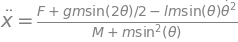

In [12]:
display(Eq(x_dd,solutions[x_dd]))

#### Lösung für $\ddot{\theta}$:

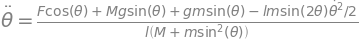

In [13]:
display(Eq(theta_dd, solutions[theta_dd]))

### Gleichungssystem

Als Ergebnis bekommen wir zwei Differentialgleichungen **2. Ordnung**.

Diese müssen in DGL **1. Ordung** umgewandelt werden, damit Python diese *numerisch* Lösen kann!

Dafür werden die Variablen $v$ und $\omega$ eingeführt, um das System über 4 DGL 1. Ordnung beschreiben zu können:

1. $\dot x = v$
2. $\ddot x = \dot v$ 


3. $\dot\theta = \omega$
4. $\ddot\theta = \dot \omega$


Die **symbolischen** Ausdrücke müssen für den Solver als **numerische** Funktionen implementiert werden.

Hierfür wird sympy's `lambdify` Methode genutzt, welche die symbolischen Funktionen und deren Parameter erwartet.

* $dx/dt = v$
* $d v/dt =$ solutions[x_dd]


* $d\theta/dt = \omega$
* $d\omega/dt =$ solutions[theta_dd]

In [14]:
dxdt = lambdify(x_d, x_d)
dvdt = lambdify((t,g,M,m,l,theta,theta_d, F), solutions[x_dd])

dthetadt = lambdify(theta_d, theta_d)
domegadt = lambdify((t,g,M,m,l,theta,theta_d, F), solutions[theta_dd])

### State-Vektor

Der Systemzustand wird über den zeitabhängigen *State-Vektor* $\vec{S} = [x, v, \theta, \omega]$ definiert.

Der Python Solver benötigt eine Funktion, die $\vec{S}$ entgegennimmt und $d\vec{S}/dt$ zurückgibt $\rightarrow d\vec{S}/dt (\vec{S}, t)$.

In [15]:
def dSdt(S, t, g, M, m, l, F):
    x, v, theta, omega = S
    return [
        dxdt(v),
        dvdt(t,g,M,m,l,theta, omega, F),
        dthetadt(omega),
        domegadt(t,g,M,m,l,theta,omega, F)
    ]

### Symbolisch $\rightarrow$ Numerisch

Bis hierhin wurde das System ausschließlich symbolisch betrachtet. 
Der Bewegungsablauf des inversen Pendels soll nun konktret dargestellen werden.
Hierfür werden folgende Größen definiert:
* der Zeitbereich $t$
* die numerischen Konstanten $g, M, m, l$ und ($F$)
* der Anfangszustand $S_0$

In [39]:
from numpy import linspace

t1 = 10                          # s
samples = 200                    # n
t = linspace(0, t1, samples)     # s

g = 9.81                         # m/s^2
M = 5                            # kg
m = 1                            # kg
l = 1                            # m
F = 0                            # N

S0 = [0, 0, 0.1, 0]              # m, m/s, rad, rad/s

### Numerisches Lösen der Gleichungen mit scipy's `odeint`:

Die Methode `odeint` erwartet folgende Parameter:
* die Differentialgleichungen (1. Ordnung)
* den Anfangszustand $S_0$
* den Zeitbereich $t$
* und die numerischen Konstanten als weitere Arguente

In [40]:
from scipy.integrate import odeint

ans = odeint(dSdt, y0=S0, t=t, args=(g, M, m, l, F))

x = ans.T[0]
theta = ans.T[2]

## Die numerische Berechnung der Bewegungsgleichung ist bis hierhin abgeschlossen!

### Letzendlich folgt die Darstellung der Ergebnisse mit matplotlib:

In [41]:
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec
from matplotlib.animation import PillowWriter
%matplotlib inline
#%matplotlib notebook # animation im Jupyter Notebook

### Animation der Bewegungsgleichung

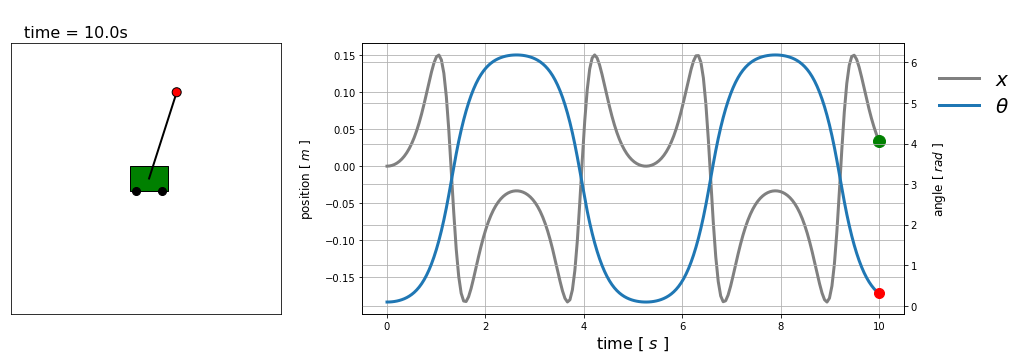

In [42]:
fig = plt.figure(figsize=(16,5))
gs = GridSpec(nrows=1, ncols=2, width_ratios=[1, 2])

# Title
string = r"%s "%(' ')
fig.suptitle(string, fontsize=24)

# Pendelplot
ax1 = fig.add_subplot(gs[0, 0], autoscale_on=True, xlim=(-l*1.5, l*1.5), ylim=(-l*1.5, l*1.5)) 
ax1.get_xaxis().set_ticks([]) # enable this to hide x axis ticks
ax1.get_yaxis().set_ticks([]) # enable this to hide y axis ticks

# Wagen
cart = ax1.add_patch(Rectangle((0, 0), 0, 0, linewidth=1, edgecolor='k', facecolor='g'))
wheels, = ax1.plot([], [], 'ok', markersize=8) 
cart_w = 0.42 # Breite
cart_h = 0.28 # Höhe

# Pendel
pendulum, = ax1.plot([], [], '-k', lw=2) # Pendelstange als Linie darstellen
circle = plt.Circle((0,0), 0.05, fc='r', edgecolor='k', zorder=3) # Pendelmasse als Kreis darstellen
circle = ax1.add_patch(circle)

# Zeitlabel
dt = t1 / samples
time_template = 'time = %.1fs'
time_text = ax1.text(0.05, 1.02, '', transform=ax1.transAxes, fontsize=16)

# Zeitplot Wagen
ax2 = fig.add_subplot(gs[:, 1], autoscale_on=True)
ax2.set_xlabel('time [$~s~$]', fontsize=16)
ax2.plot(t,x, color="grey", linewidth=3, alpha=1, label="$x$")
ax2.legend(loc=(1.05,0.8), frameon=False, fontsize=20)
ax2.set_ylabel('position [$~m~$]', color='k', fontsize=12, labelpad=10)
ax2.grid()
x_point, = ax2.plot([], [], 'o-', color='g', markersize=12)

# Zeitplot Pendel
ax3 = ax2.twinx()
ax3.plot(t,theta, color="tab:blue", linewidth=3, alpha=1, label=r"$\theta$")
ax3.legend(loc=(1.05,0.7), frameon=False, fontsize=20)
ax3.set_ylabel('angle [$~rad~$]', fontsize=12, labelpad=14)
ax3.grid()
theta_point, = ax3.plot([], [], 'o-', color='r', markersize=10)


def init():
    cart.set_height(cart_h)
    cart.set_xy((-cart_w/2, -cart_h/2))
    cart.set_width(cart_w)
    pendulum.set_data([], [])
    wheels.set_data([],[])
    time_text.set_text('')
    return cart, pendulum, time_text

def animate(i):
    
    # Wagenposition
    cart.set_x(x[i] - cart_w/2)
    wheels.set_data([x[i]+cart_w/3, x[i]-cart_w/3],[-cart_h/2,-cart_h/2])
    
    # Pemdelmasse
    x2 = l * sin(theta[i]) + x[i]
    y2 = l * cos(theta[i])
    circle.set_center((x2, y2))
    
    # Pendelstande
    thisx = [x[i], x2]
    thisy = [0, y2]
    pendulum.set_data(thisx, thisy)
    
    # Samplezeit
    time_text.set_text(time_template % (i*dt))
    
    # Zeitverlauf
    x_point.set_data(t[i], x[i])
    theta_point.set_data(t[i], theta[i])
    
    return cart, pendulum, time_text

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=samples, blit=True)
ani.save('invertedPendulum.gif', writer='pillow', fps=samples/t1, dpi=180)